In [29]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

from outliermod import skewness,outliersCheck,outlier_graph,censoring_outliers

In [9]:
df = pd.read_csv('HARGA RUMAH JAKSEL.csv', sep=';')
df

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28.000.000.000,1100,700,5,6,ADA,JAKSEL
1,19.000.000.000,824,800,4,4,ADA,JAKSEL
2,4.700.000.000,500,400,4,3,ADA,JAKSEL
3,4.900.000.000,251,300,5,4,ADA,JAKSEL
4,28.000.000.000,1340,575,4,5,ADA,JAKSEL
...,...,...,...,...,...,...,...
996,16.000.000.000,488,550,6,5,ADA,JAKSEL
997,4.500.000.000,209,270,4,4,ADA,JAKSEL
998,29.000.000.000,692,400,4,3,TIDAK ADA,JAKSEL
999,1.700.000.000,102,140,4,3,TIDAK ADA,JAKSEL


In [10]:
Harga = []
for i in range(len(df)):
    res = (df['HARGA'].iloc[i].translate({ord('.'): None}))
    Harga.append(res)
    
df['HARGA'] = Harga

In [11]:
df

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL
...,...,...,...,...,...,...,...
996,16000000000,488,550,6,5,ADA,JAKSEL
997,4500000000,209,270,4,4,ADA,JAKSEL
998,29000000000,692,400,4,3,TIDAK ADA,JAKSEL
999,1700000000,102,140,4,3,TIDAK ADA,JAKSEL


In [12]:
df['HARGA'] = df['HARGA'].astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


# EDA

In [18]:
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

    # histogram
    sns.histplot(df[col],ax = axes[0], kde=True,line_kws={'linewidth': 3},color = 'k', bins = 20)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

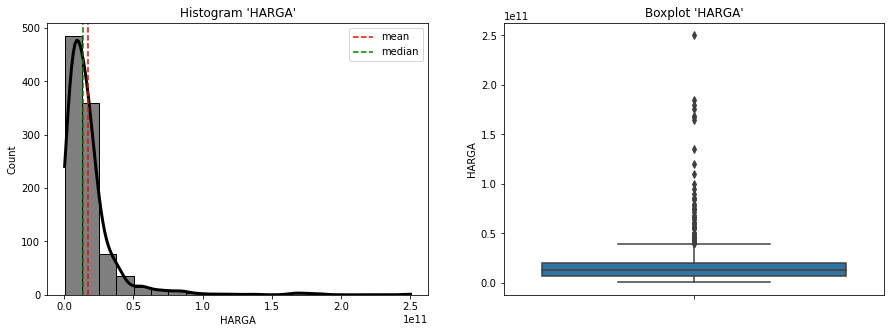

HARGA Kurtosis: 36.25677611678353
HARGA Skewness: 4.994018677764832
Columns 'HARGA' right skewed


In [19]:
plot_dist(df,'HARGA')

In [22]:
df.describe()

,HARGA,LT,LB,JKT,JKM
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000


In [23]:
df['KOTA'].unique()

array(['JAKSEL'], dtype=object)

Text(0.5, 1.0, 'Luas Bangunan dan Harga')

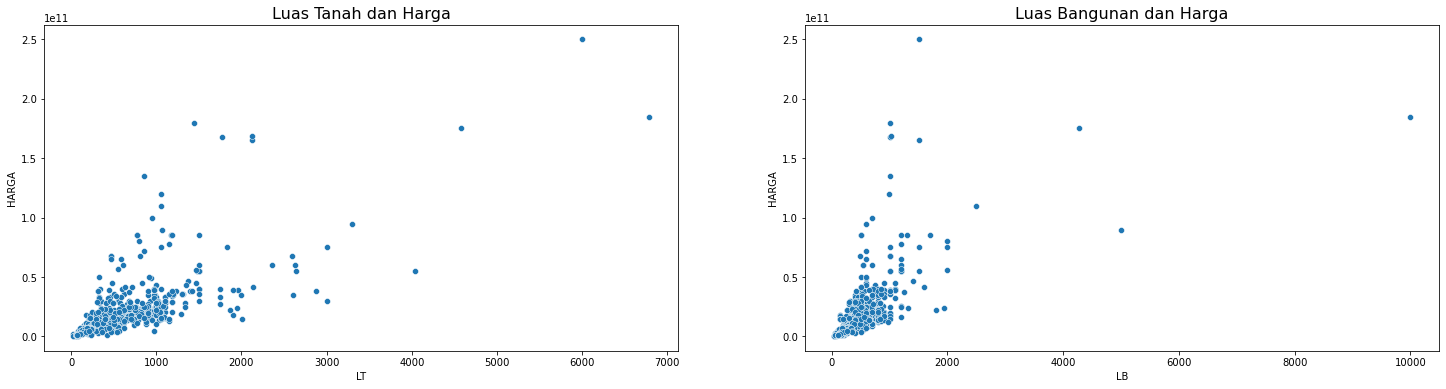

In [27]:
fig,ax = plt.subplots(ncols=2,figsize=(25,6))


sns.scatterplot(data=df,x='LT',y='HARGA',ax=ax[0])
ax[0].set_title('Luas Tanah dan Harga',fontsize= 16)

sns.scatterplot(data=df,x='LB',y='HARGA',ax=ax[1])
ax[1].set_title('Luas Bangunan dan Harga',fontsize= 16)

Luas Tanah dan Luas bangunan sangat berkoilerasi positif terhadap harga tanah

Text(0.5, 1.0, 'Jumlah Kamar Mandi')

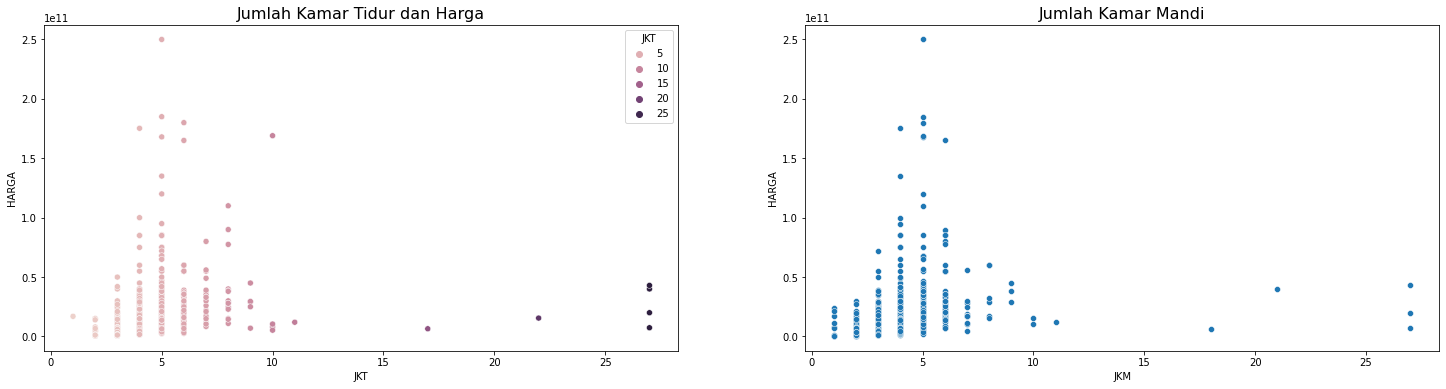

In [51]:
fig,ax = plt.subplots(ncols=2,figsize=(25,6))


sns.scatterplot(data=df,x='JKT',y='HARGA',ax=ax[0],hue='JKT')
ax[0].set_title('Jumlah Kamar Tidur dan Harga',fontsize= 16)

sns.scatterplot(data=df,x='JKM',y='HARGA',ax=ax[1])
ax[1].set_title('Jumlah Kamar Mandi',fontsize= 16)

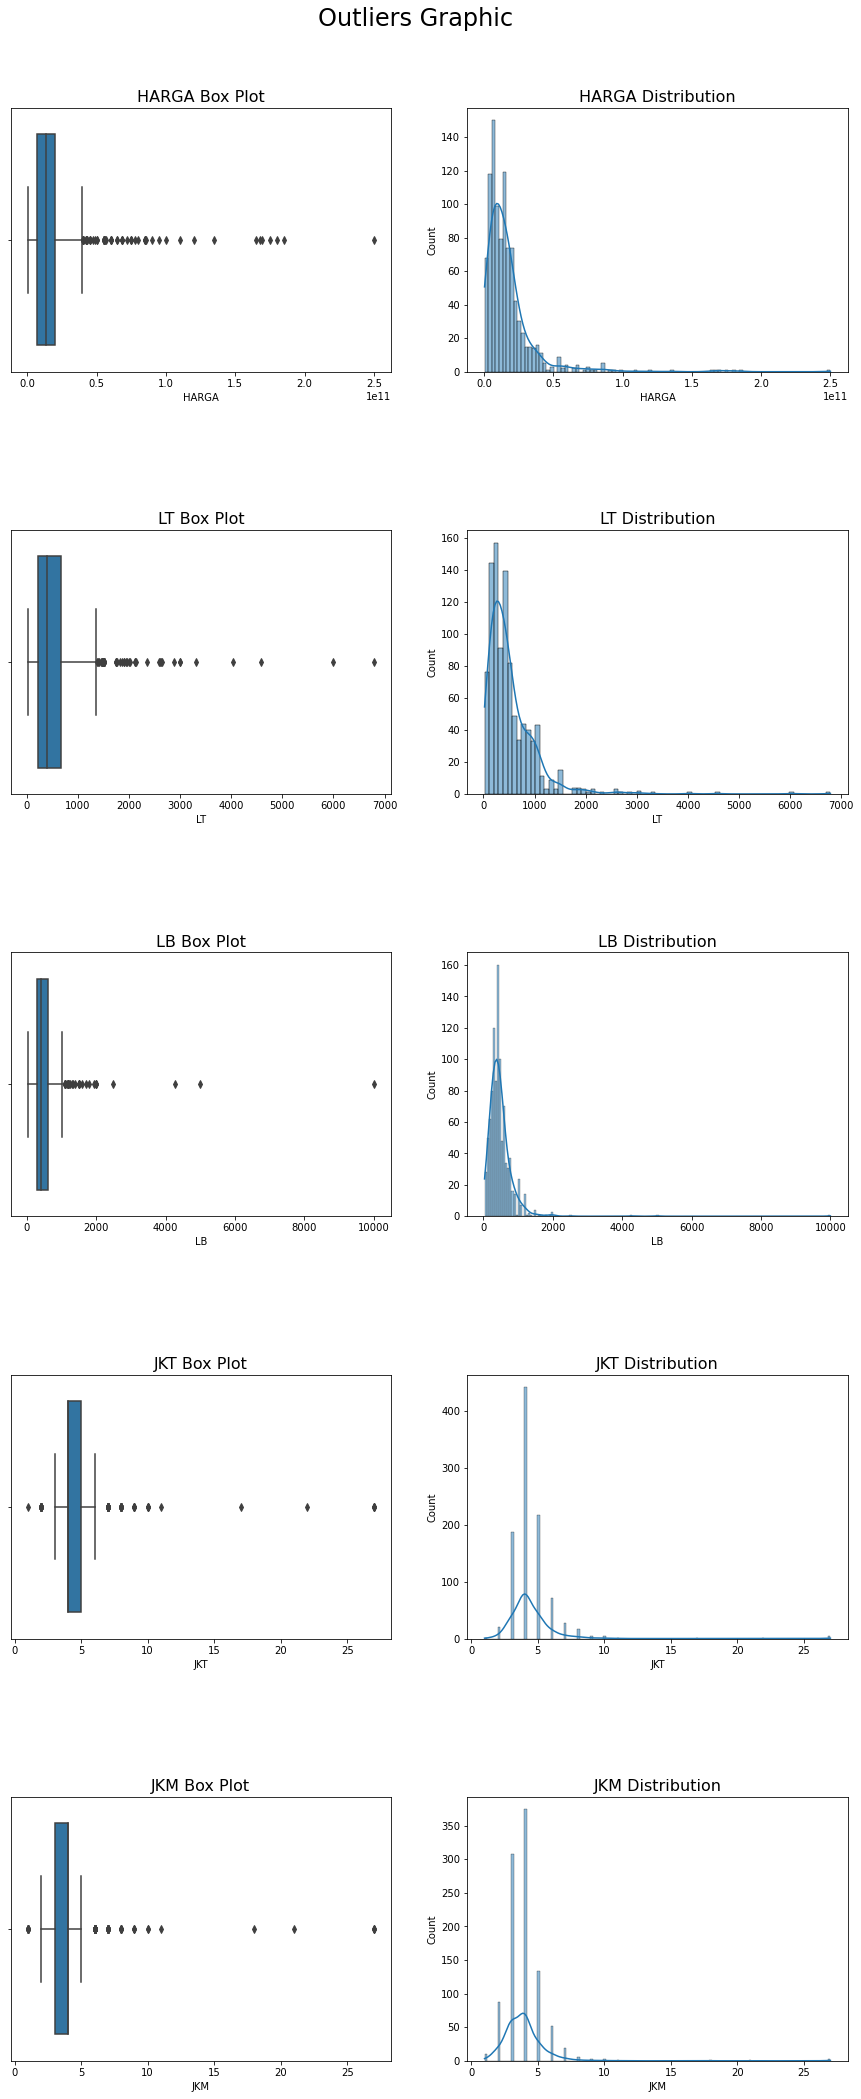

In [35]:
df_out = df[['HARGA'	,'LT'	,'LB'	,'JKT'	,'JKM']]
outlier_graph(df_out,size=(15,35))

In [36]:
col_skews = skewness(df_out)

In [38]:
outliers = outliersCheck(df_out,col_skews)

feature name :  HARGA
outliers percentage : 1.8%
distribution right_skew_ext
upper : 84750000000.0 lower : -37550000000.0
****************************************************
feature name :  LT
outliers percentage : 0.8%
distribution right_skew_ext
upper : 2683.0 lower : -1276.0
****************************************************
feature name :  LB
outliers percentage : 0.8%
distribution right_skew_ext
upper : 1900.0 lower : -765.0
****************************************************
feature name :  JKT
outliers percentage : 0.7%
distribution right_skew_ext
upper : 10.0 lower : 0.0
****************************************************
feature name :  JKM
outliers percentage : 0.8%
distribution right_skew_ext
upper : 9.0 lower : -1.0
****************************************************


In [39]:
df_clean = censoring_outliers(df_out,outliers,0.05)

In [40]:
col_skews = skewness(df_clean)
outliers = outliersCheck(df_clean,col_skews)

feature name :  JKM
outliers percentage : 9.8%
distribution normal
upper : 5.982455338976555 lower : 1.611950255429039
****************************************************
feature name :  LT
outliers percentage : 0.0%
distribution right_skew
upper : 1362.5 lower : -465.5
****************************************************
feature name :  LB
outliers percentage : 0.0%
distribution right_skew
upper : 1050.0 lower : -150.0
****************************************************
feature name :  JKT
outliers percentage : 8.2%
distribution right_skew
upper : 6.5 lower : 2.5
****************************************************
feature name :  HARGA
outliers percentage : 0.0%
distribution right_skew_ext
upper : 84750000000.0 lower : -37550000000.0
****************************************************


# EDA handled Outlier

Text(0.5, 1.0, 'Luas Bangunan dan Harga')

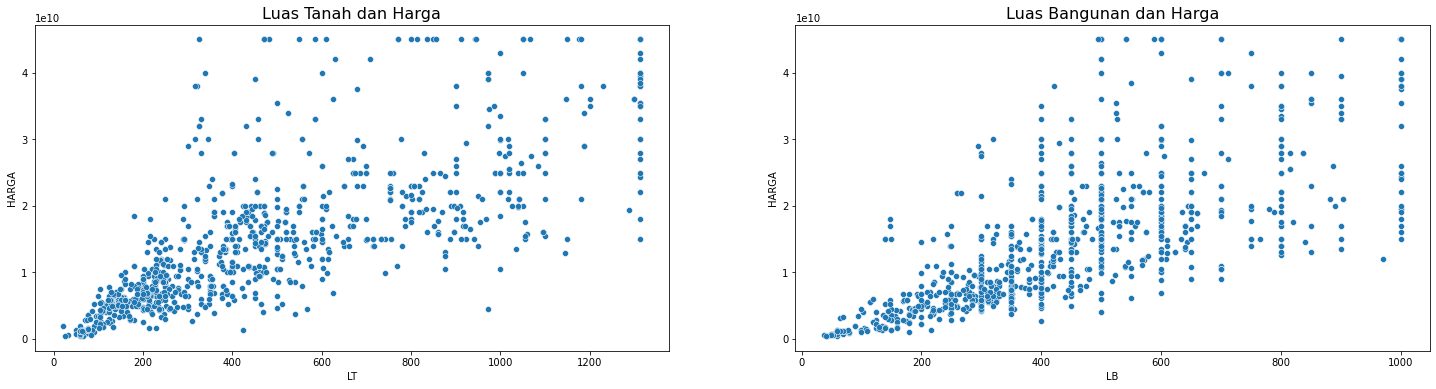

In [41]:
fig,ax = plt.subplots(ncols=2,figsize=(25,6))


sns.scatterplot(data=df_clean,x='LT',y='HARGA',ax=ax[0])
ax[0].set_title('Luas Tanah dan Harga',fontsize= 16)

sns.scatterplot(data=df_clean,x='LB',y='HARGA',ax=ax[1])
ax[1].set_title('Luas Bangunan dan Harga',fontsize= 16)

Text(0.5, 1.0, 'Jumlah Kamar Mandi')

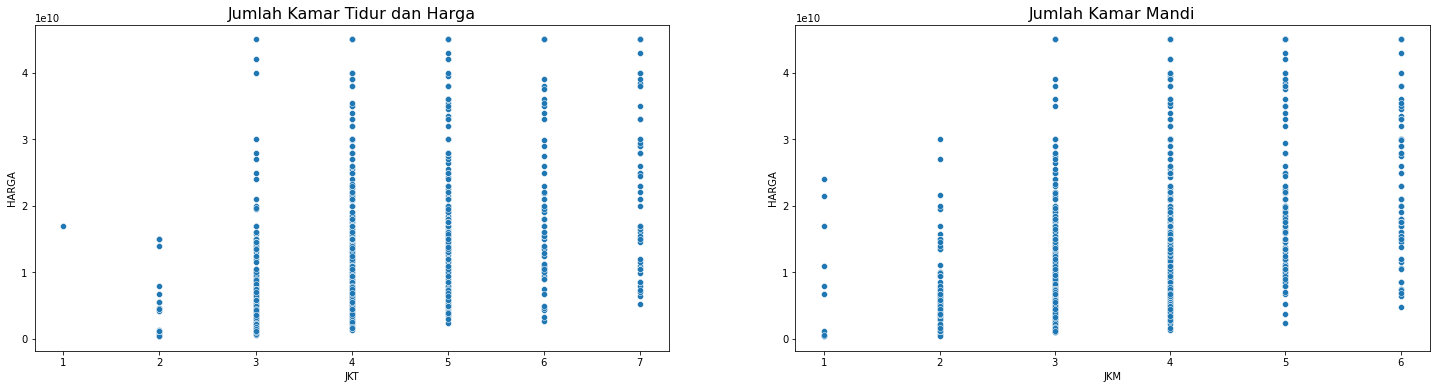

In [42]:
fig,ax = plt.subplots(ncols=2,figsize=(25,6))


sns.scatterplot(data=df_clean,x='JKT',y='HARGA',ax=ax[0])
ax[0].set_title('Jumlah Kamar Tidur dan Harga',fontsize= 16)

sns.scatterplot(data=df_clean,x='JKM',y='HARGA',ax=ax[1])
ax[1].set_title('Jumlah Kamar Mandi',fontsize= 16)

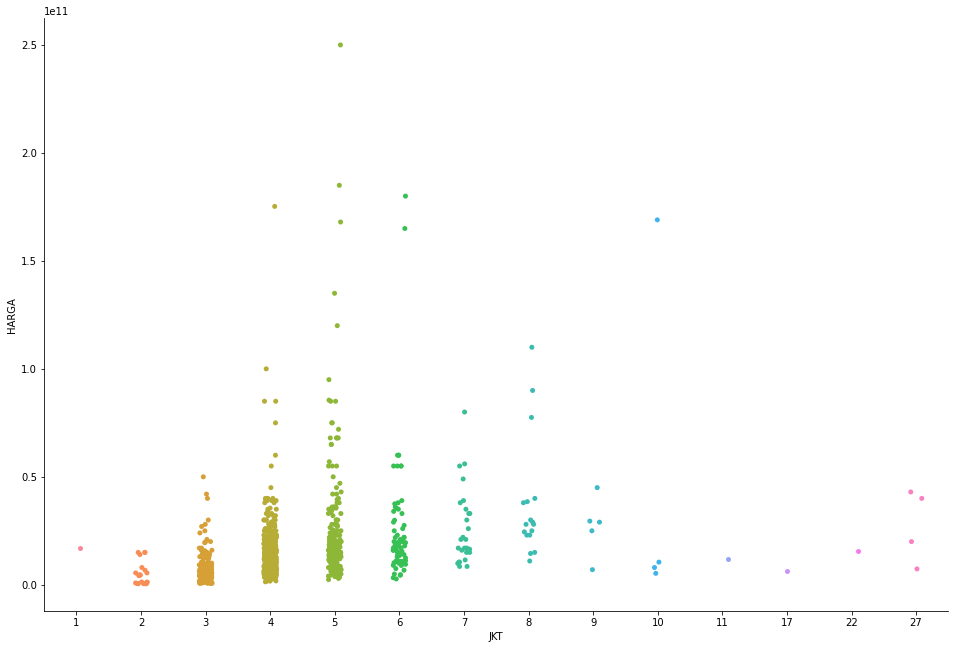

In [56]:

sns.catplot(data=df,x='JKT',y='HARGA')
plt.gcf().set_size_inches(15, 10)

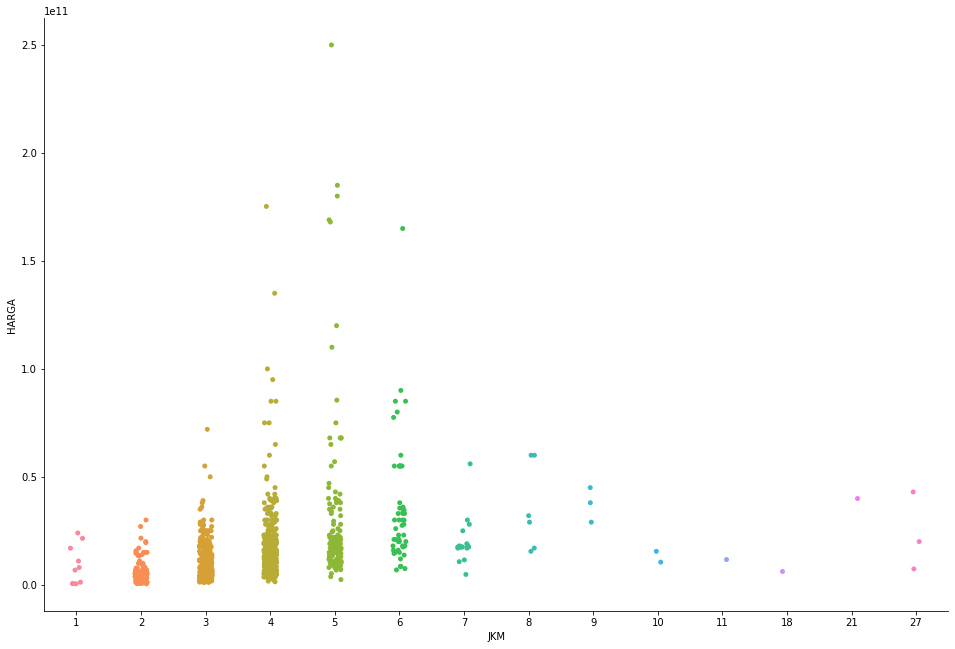

In [57]:
sns.catplot(data=df,x='JKM',y='HARGA')
plt.gcf().set_size_inches(15, 10)

In [58]:
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


<AxesSubplot:xlabel='HARGA', ylabel='GRS'>

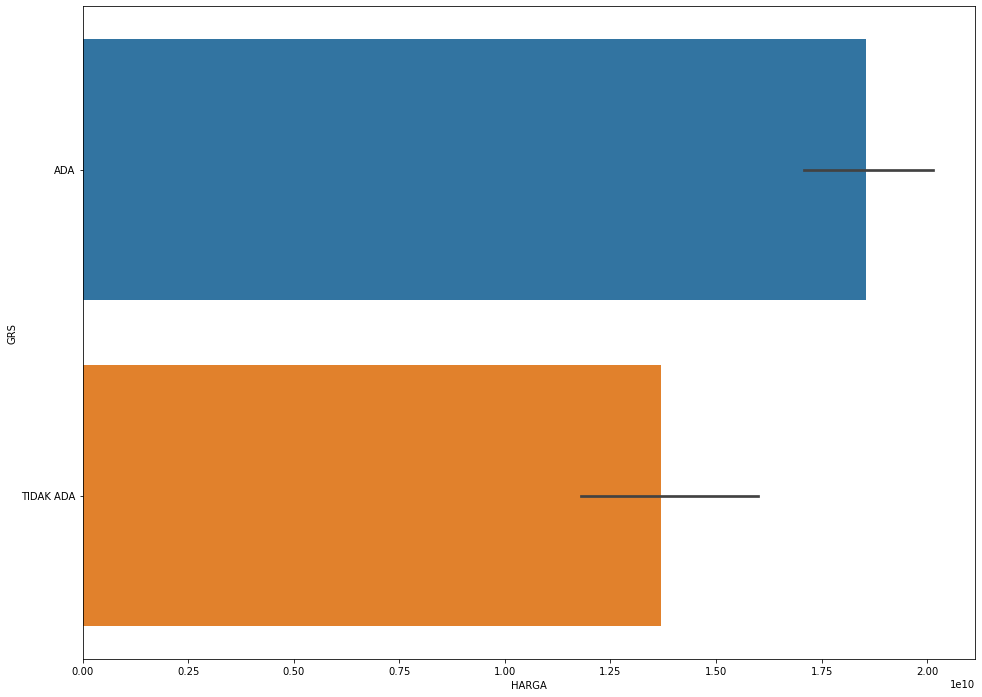

In [61]:
sns.barplot(data=df,x='HARGA',y='GRS')

Rumah dengan Garasi Lebih Mahal Hrganya